# 12.5.4 NCI60 Data Example

Unsupervised techniques are often used in the analysis of genomic data. In particular, PCA and hierarchical clustering are popular tools. We illustrate these techniques on the `NC160` cancer cell line microarray data, which consists of $6,830$ gene expression measurements on 64 cancer cell lines.

In [1]:
library(ISLR2)
nci.labs <- NCI60$labs
nci.data <- NCI60$data

Each cell line is labeled with a cancer type, given in `nci.labs`. We do not make use of the cancer types in performing PCA and clustering, as these are unsupervised techniques. But after performing PCA and clustering, we will check to see the extent to which these cancer types agree with the results of these unsupervised techniques.

The data has 64 rows and $6,830$ columns.

In [2]:
dim(nci.data)

[1]   64 6830

We begin by examining the cancer types for the cell lines.

In [3]:
nci.labs[1:4]

[1] "CNS"   "CNS"   "CNS"   "RENAL"

In [4]:
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

## PCA on the NCI60 Data

We first perform PCA on the data after scaling the variables (genes) to have standard deviation one, although one could reasonably argue that it is better not to scale the genes.

In [5]:
pr.out <- prcomp(nci.data, scale = TRUE)

We now plot the first few principal component score vectors, in order to visualize the data. The observations (cell lines) corresponding to a given cancer type will be plotted in the same color, so that we can see to what extent the observations within a cancer type are similar to each other. We first create a simple function that assigns a disticnt color to each element of a numeric vector. The function will be used to assign a color to each of the 64 cell lines, based on the cancer type to which it corresponds.

In [6]:
Cols <- function(vec) {
    cols <- rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}

Note that the `rainbow()` function takes as its argument a positive integer and returns a vector containing that number of distinct colors. We now can plot the principal component score vectors.

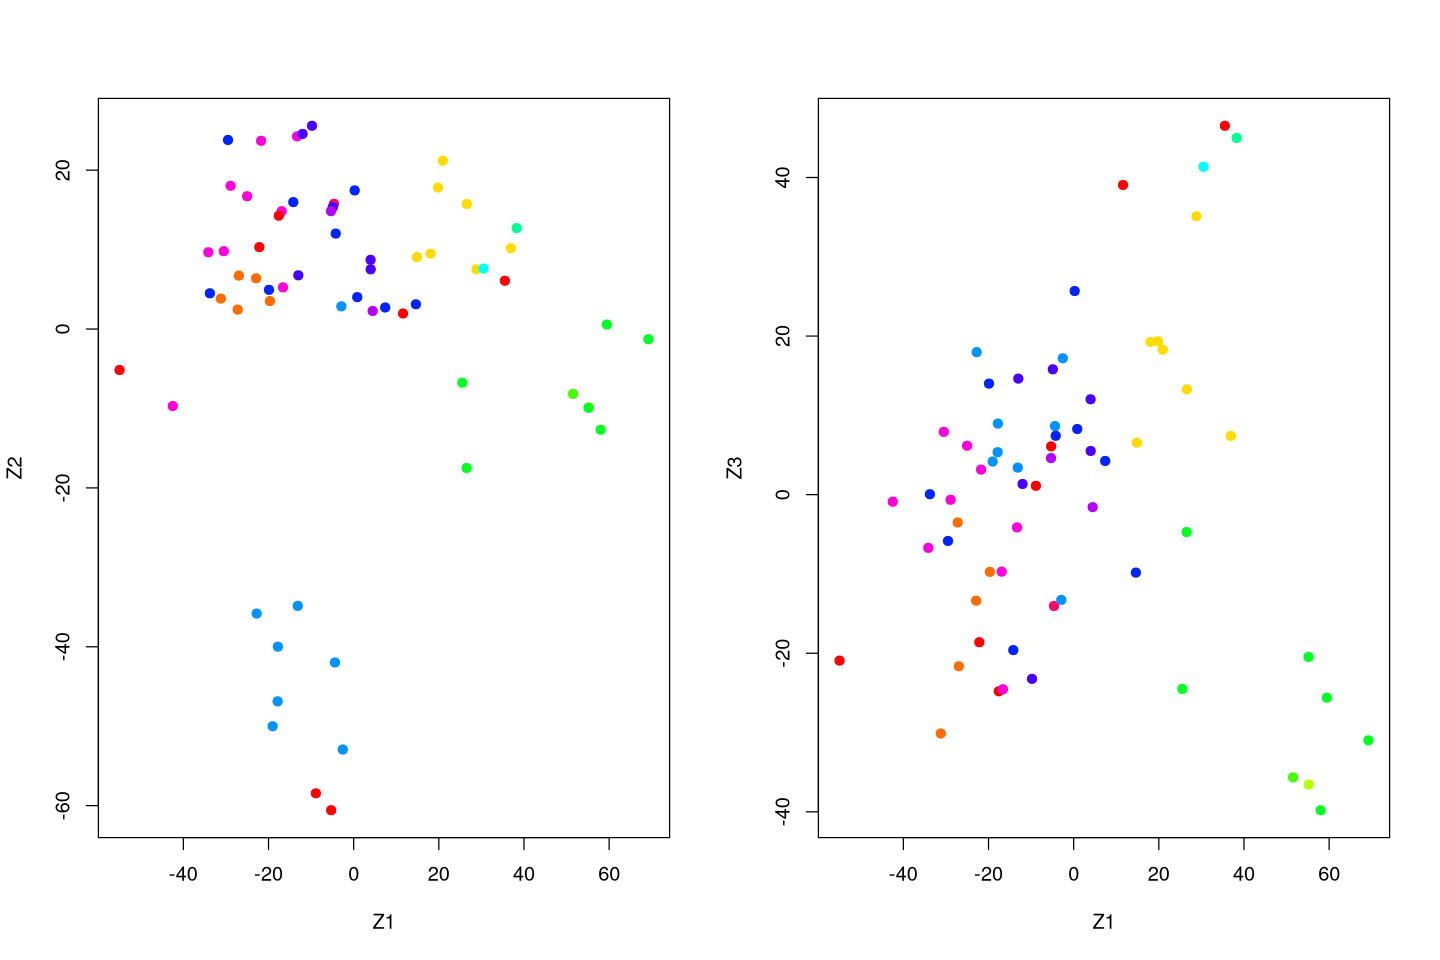

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8)
par(mfrow = c(1, 2))
plot(pr.out$x[, 1:2], col = Cols(nci.labs), pch = 19,
     xlab = "Z1", ylab = "Z2")
plot(pr.out$x[, c(1, 3)], col = Cols(nci.labs), pch = 19,
     xlab = "Z1", ylab = "Z3")

The resulting plots are shown in the Figure. On the whole, cell lines corresponding to a single cancer type do tend to have similar values on the first few principal component score vectors. This indicates that cell lines from the same cancer type tend to have pretty similar gene expression levels.

We can obtain a summary of the proportion of variance explained (PVE) of the first few principal components using the `summary()` method for a `prcomp` object (we have truncated the printout):

In [9]:
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

Using the `plot()` function, we can also plot the variance explained by the first few principal components.

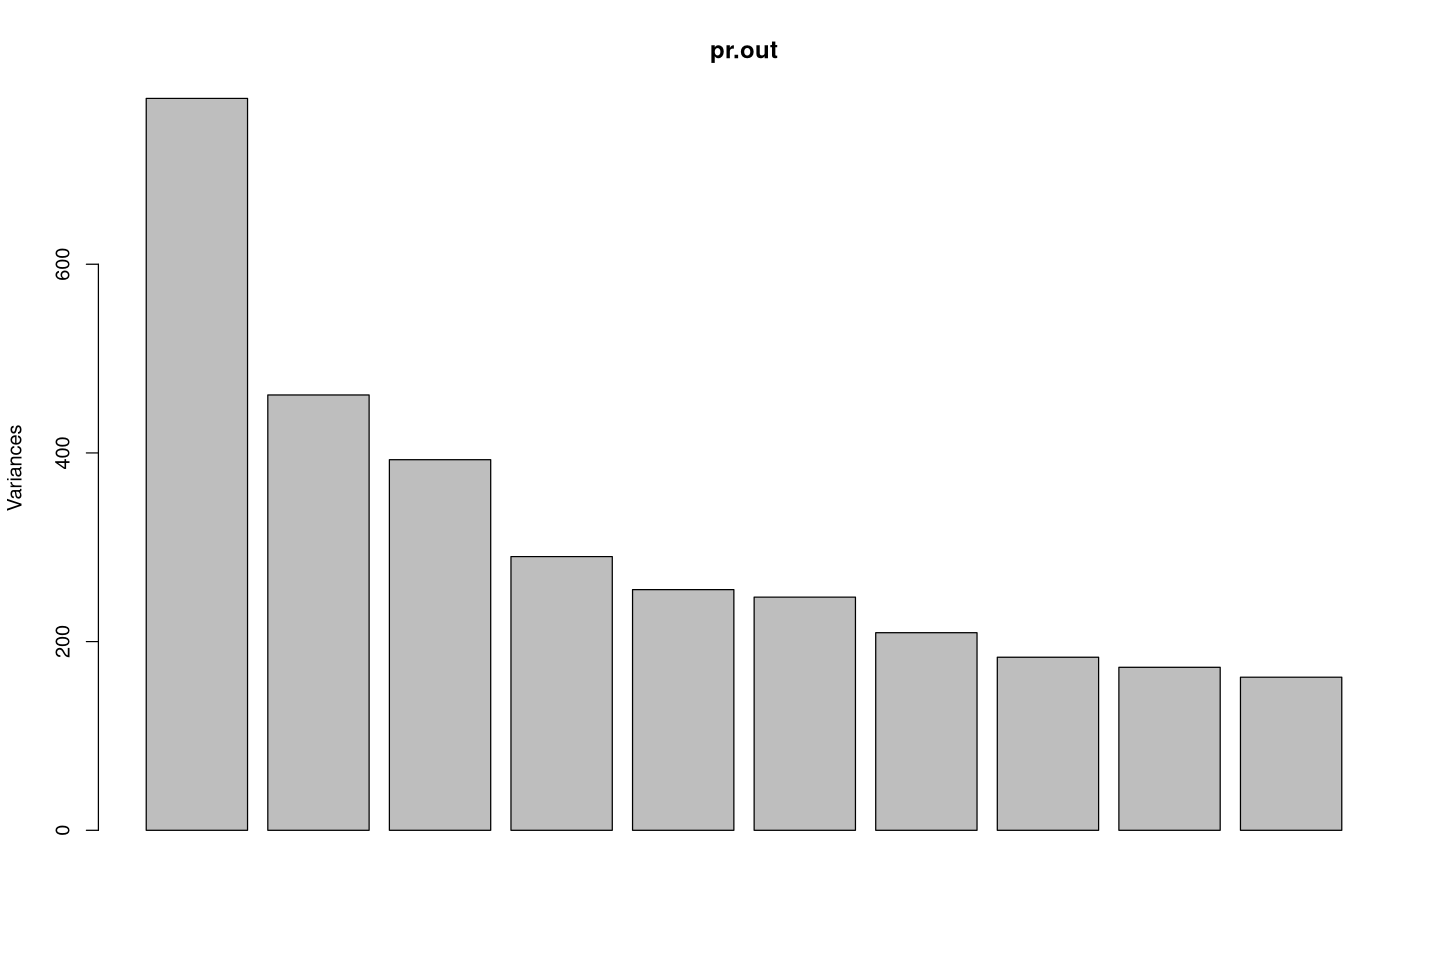

In [10]:
plot(pr.out)

Note that the height of each bar in the bar plot is given by squaring the corresponding element of `pr.out$sdev`. However, it is more informative to plot the PVE of each principal component. (i.e. a scree plot) and the cumulative PVE of each principal component. This can be done with just a little work.

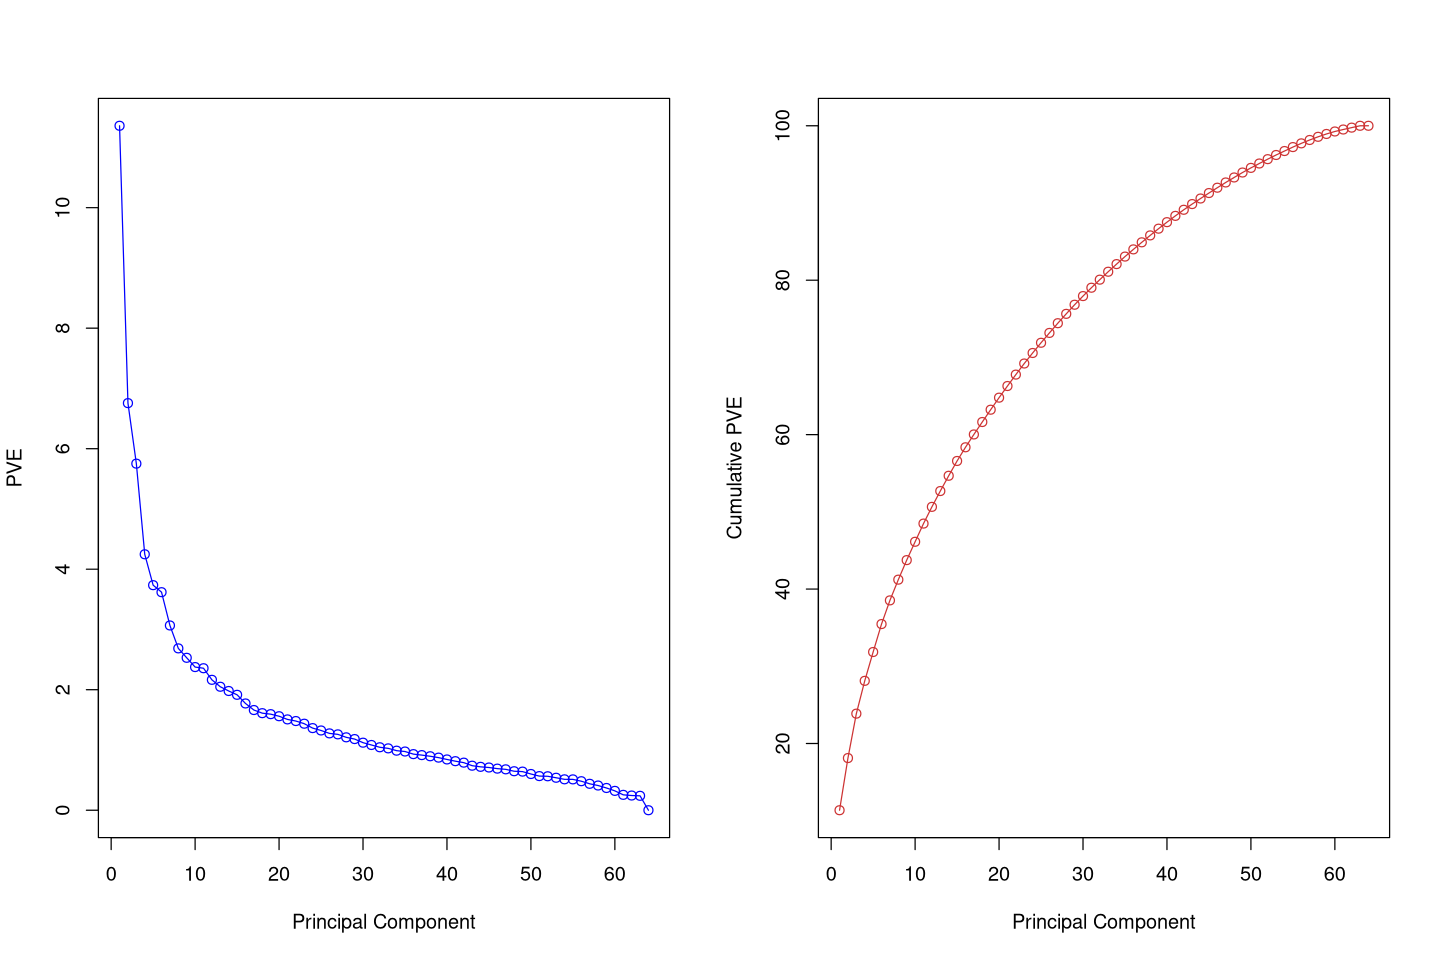

In [11]:
pve <- 100 * pr.out$sdev^2 / sum(pr.out$sdev^2)
par(mfrow = c(1, 2))
plot(pve, type = "o", ylab = "PVE",
     xlab = "Principal Component", col = "blue")
plot(cumsum(pve), type = "o", ylab = "Cumulative PVE",
     xlab = "Principal Component", col = "brown3")

(Note that the elements of `pve` can also be computed directly from the summary, `summary(pr.out)$importance[2,]`, and the elements of `cumsum(pve)` are given by `summary(pr.out)$importance[3,]`). The resulting plots are shown in Figure 12.18. We see that together, the first seven principal components explain around $40\%$ of the variance in the data. This is not a huge amount of the variance. However, looking at the scree plot, we see that amount of variance, there is a marked decrease in the variance explained by furthher principal components. That is, there is an _elbow_ in the plot after approximately the seventh principal component. This suggests that there may be little benefit to examining more than seven or so principal components (though even examining seven principal components may be difficult).

## Clustering the Observations of the NCI60 Data